In [1]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('data.csv')


In [4]:
df.sample(5)

,Unnamed: 0,text,sentiment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
2846,NaN,Apple is expected to launch a new iPhone this ...,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7287,NaN,My bum hurts.,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8420,NaN,Ouchies. Sorry to hear it Are you going to g...,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23243,NaN,"_d No, it`s not...",neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4254,NaN,notthebest weekend....but oh well....I have a ...,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   text         27476 non-null  object 
 2   sentiment    27474 non-null  object 
 3   Unnamed: 3   208 non-null    object 
 4   Unnamed: 4   93 non-null     object 
 5   Unnamed: 5   11 non-null     object 
 6   Unnamed: 6   7 non-null      object 
 7   Unnamed: 7   3 non-null      object 
 8   Unnamed: 8   3 non-null      object 
 9   Unnamed: 9   2 non-null      object 
 10  Unnamed: 10  2 non-null      object 
 11  Unnamed: 11  1 non-null      object 
 12  Unnamed: 12  1 non-null      object 
 13  Unnamed: 13  1 non-null      object 
 14  Unnamed: 14  1 non-null      object 
dtypes: float64(1), object(14)
memory usage: 3.1+ MB


In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [7]:
df.rename(columns={'sentiment':'target'},inplace=True)
df.sample(5)

,Unnamed: 0,text,target,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
16483,NaN,omg you`ve never seen `the Ring` its a creppy...,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12376,NaN,I never thought falling in love can cause so m...,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23031,NaN,_**** I do! I`ll probably get fired if I do t...,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27073,NaN,"3OH!3 - Rich man is amazing, really can`t be b...",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8236,NaN,I can`t make it. My manager switched my sched...,neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop(columns=['Unnamed: 0','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'],inplace=True)
df

,text,target
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [9]:
df['target'].unique()

array(['neutral', 'negative', 'positive', 'fun', 'thanks',
       'keeps getting such delayed responses. why is my internet so messed up?!',
       'thanxx', 'Happy St', ') yourself?', 'Thanks you so much',
       'who I think is very smart',
       'Ahhhh!!!!!! Almost off!!! Can`t wait!! But..I got work again rite after this!   HAT CLUB Come && gimme some Company! Oh && a Cookie! ',
       'WELCOME',
       "awwww..... thought it`d be a 'yummy' experience.  Will try it next time",
       'being updated to have multiple `skins` for different GT members. Nightmare. 82k of CSS to hack!  No time to redo',
       'IM SOWWIE I WAS A LIL LATE  LOL it looked good though ',
       'lucky u', 'bet sexy',
       'so true   sad to say.  I`m glad you`ll be with me to be my support group',
       'I`m really disappointed', ') you know you want to!',
       'happy mother`s day', 'smells guuud.', 'greaaaaat',
       ' but i like it... a lot!',
       'I am very bummed that there are no babydoll or sp

In [10]:
# df['target'] = pd.factorize(df['target'])[0]
# df
# df['target'].unique()
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# df['target'] = encoder.fit_transform(df['target'])

# df

# df=df[df['target']!='neutral']
# df=df[df['target']!='negative']
df= df[(df['target'] == 'positive') | (df['target'] == 'negative')]
# df.head()
df.shape

(16221, 2)

In [11]:
df['target'] = pd.factorize(df['target'])[0]
df

C:\Users\USER\AppData\Local\Temp\ipykernel_3204\38571189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = pd.factorize(df['target'])[0]


,text,target
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
6,2am feedings for the baby are fun when he is a...,1
...,...,...
27475,enjoy ur night,1
27476,wish we could come see u on Denver husband l...,0
27477,I`ve wondered about rake to. The client has ...,0
27478,Yay good for both of you. Enjoy the break - y...,1


In [12]:
# list = ["text","sentiment"]
# df_master = df1.merge(df2,
#                    on = list,
#                    how = 'outer')
# df_master.to_csv("df_master.csv",index=False)

In [13]:
# missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(16221, 2)

In [16]:
df.head()

,text,target
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
6,2am feedings for the baby are fun when he is a...,1


In [17]:
df['target'].value_counts()

target
1    8489
0    7732
Name: count, dtype: int64

In [19]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 475.7 kB/s eta 0:00:03
   -------------------- ------------------- 0.8/1.5 MB 570.6 kB/s eta 0:00:02
   --------------------------- ------------ 1.0/1.5 MB 666.6 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 617.6 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 632.3 kB/s eta 0:00:00

   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 0/5 [tqdm]
   ---------------------------------------- 

In [20]:
import nltk


In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
df['num_characters'] = df['text'].apply(len)

C:\Users\USER\AppData\Local\Temp\ipykernel_3204\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# print(stop_words)

In [25]:
import string
from nltk.stem import PorterStemmer
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [27]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [29]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [30]:
df['transformed_text'] = df['text'].apply(transform_text)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_3204\1835954565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,text,target,num_characters,transformed_text
1,Sooo SAD I will miss you here in San Diego!!!,0,46,sooo sad miss san diego
2,my boss is bullying me...,0,25,boss bulli
3,what interview! leave me alone,0,31,interview leav alon
4,"Sons of ****, why couldn`t they put them on t...",0,75,son put releas alreadi bought
6,2am feedings for the baby are fun when he is a...,1,64,2am feed babi fun smile coo
...,...,...,...,...
27475,enjoy ur night,1,16,enjoy ur night
27476,wish we could come see u on Denver husband l...,0,77,wish could come see u denver husband lost job ...
27477,I`ve wondered about rake to. The client has ...,0,122,wonder rake client made clear forc dev learn n...
27478,Yay good for both of you. Enjoy the break - y...,1,111,yay good enjoy break probabl need hectic weeke...


In [32]:
pip install wordcloud


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 432.1 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.1 MB 432.1 kB/s eta 0:00:18
   -- ------------------------------------- 0.5/8.1 MB 432.1 kB/s eta 0:00:18
   --- ------------------------------------ 0.8/8.1 MB 471.6 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/8.1 MB 471.6 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.1 MB 531.0 kB/s eta 0:00:14
   ----- ---------------------------------- 1.0/8.1 MB 531.0 kB/s eta 0:00:14
   ------ ------------------------------

In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

Matplotlib is building the font cache; this may take a moment.


In [34]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

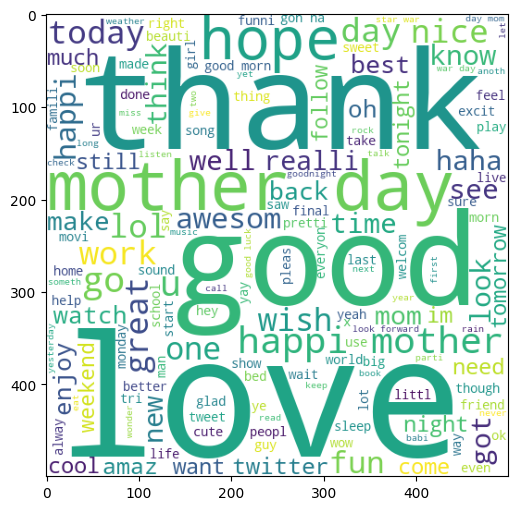

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [36]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

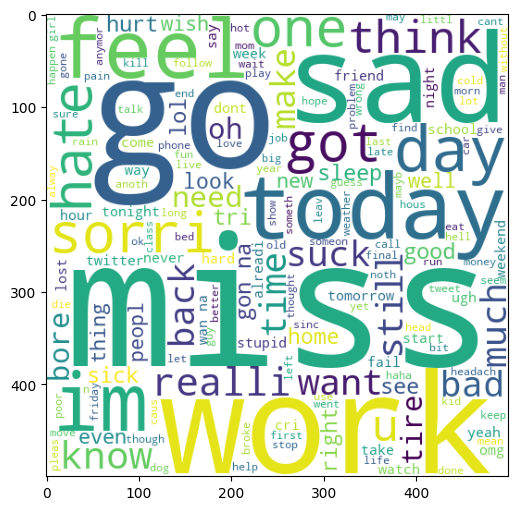

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
positive = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        positive.append(word)

len(positive)

62202

In [43]:
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 376.9 kB/s eta 0:00:28
   - -------------------------------------- 0.5/11.1 MB 376.9 kB/s eta 0:00:28
   -- ------------------------------------- 0.8/11.1 MB 465.1 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/11.1 MB 465.1 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/11.1 MB 465.1 kB/s eta 0:00:23
   --- ------------------------------------ 1.0/11.1 MB 456.8 kB/s eta 0:00:22
   --- ------------------------------------ 1.0/11.1 MB 456.8 kB/s eta 0:00:22
   ---- ----------------------------------- 1.3/11.1 MB 485.7 kB/s eta 0:00:21
   ----- ---------

In [44]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
# df['transformed_text']
# df
# X.shape
df['transformed_text'].shape

(16221,)

In [45]:
X.shape

(16221, 3000)

In [46]:
y = df['target'].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)


In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7057010785824345
[[ 974  573]
 [ 382 1316]]
0.6966649020645844


In [52]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8456086286594762
[[1266  281]
 [ 220 1478]]
0.8402501421262081


In [53]:
X_test.shape

(3245, 3000)

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
import pandas as pd

# Create a DataFrame from lists
raw_text=input("Enter a comment")
# raw_text = "This is a raw text document"
data = {'Name': pd.Series([raw_text])}

df1= pd.DataFrame(data)
# print(df)
df1['Name'].shape
df1
df1['Name'] = df1['Name'].apply(transform_text)


X1 = tfidf.fit_transform(df1['Name']).toarray()

p=X1.shape[1]

num_zeroes = 3000-p


zeroes_array = np.zeros((1, num_zeroes))

# Concatenate the original array and the zeroes array horizontally
new_array = np.concatenate((X1, zeroes_array), axis=1)
new_array.shape
X1=new_array
ac = bnb.predict(X1)
# ac[0]
# df1['Name']

if ac[0] ==1 :
  print("positive")
else :
    print("Negative")